In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### Reading Training data

In [2]:
df1=pd.read_csv("./processed/training/engaged.csv")
df2=pd.read_csv("./processed/training/notEngaged.csv")
dff=pd.read_csv("./TopFeatures.csv")

In [3]:
dft=pd.concat([df1,df2])

In [4]:
feat=dff.to_numpy()
feat=feat.reshape(-1)

In [5]:
print(feat)

[' AU12_c' ' AU04_c' ' AU12_r' ' AU04_r' ' AU05_c' ' AU14_c' ' AU06_c'
 ' AU06_r' ' AU14_r' ' AU07_r' ' p_8' ' AU10_c' ' p_2' ' AU10_r' ' p_0'
 ' p_23' ' p_7' ' p_6' ' p_10' ' AU01_r' ' AU25_r' ' p_24' ' p_12' ' p_11'
 ' AU17_r' ' AU09_r' ' AU26_r' ' p_9' ' AU45_r' ' p_20' ' AU05_r'
 ' AU23_r' ' p_13' ' p_19' ' p_33' ' gaze_angle_y' ' p_5' ' AU02_r'
 ' p_26' ' p_18' ' p_16' ' gaze_1_y' ' p_32' ' AU07_c' ' AU15_c' ' AU15_r'
 ' p_30' ' p_31' ' AU20_r' ' p_4']


In [6]:
y_train=dft["Result"]
x_train=dft.drop("Result",axis=1)
x_train=x_train[feat]

In [7]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



### Initialize model with optimum parameters

In [8]:
model = svm.SVC(kernel = 'linear')

KeyboardInterrupt: 

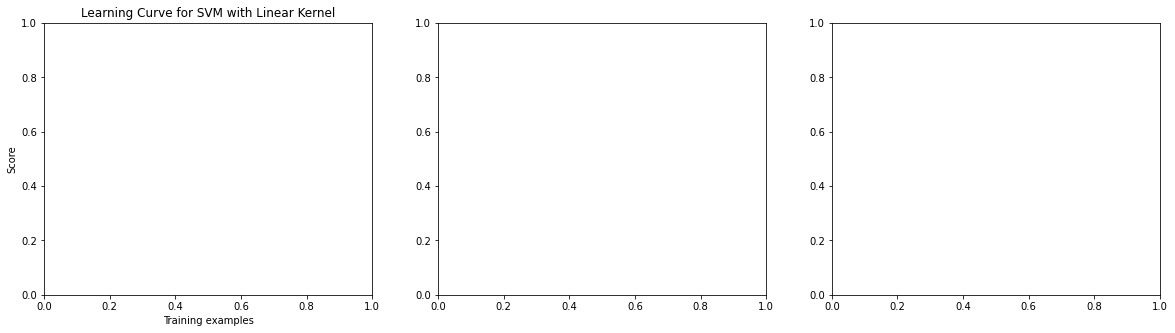

In [9]:
#fig, axes = plt.subplots(3, 1, figsize=(10, 15))


# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


title = "Learning Curve for SVM with Linear Kernel"
estimator = model
plot_learning_curve(estimator, title, x_train, y_train,
                    cv=cv, n_jobs=4)
plt.show()
plt.close()
    

### Score of the model with 100 folds

In [ ]:
avg_score=cross_val_score(model,x_train, y_train, cv=100)

In [ ]:
print(avg_score)
print(sum(avg_score)/100)

### Training of the given model

In [ ]:
model = model.fit(x_train, y_train)

In [ ]:
target_names = ['Not Engaged','Engaged']
claf_report=classification_report(y_train,model.predict(x_train),target_names=target_names,output_dict=True)
print(claf_report)

In [ ]:
helix=pd.read_csv("./TopFeatures.csv")
h2=pd.read_csv("./heatMaps.csv")
helix['value']=h2
#print(helix)
helix.to_csv("Finalmaps.csv",index=None,header=None)

g1=pd.read_csv("./Finalmaps.csv",index_col=None)
h6=helix['value'].to_numpy()
h6=np.reshape(h6, (50, 1)) # C-like index ordering
#print(h6)

## HeatMap

In [ ]:
plt.figure(figsize=(50,50))

ax=sns.heatmap(h6, annot=True, cmap="coolwarm", yticklabels=helix['0']).set_title('co-relate')
plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(pd.DataFrame(claf_report).iloc[:-1, :].T, annot=True)

### Saving the Model

In [ ]:
patho=r'./models'
joblib.dump(model, (os.path.join(patho,r''+'model_joblib_svm_linear')))

In [ ]:
plt.close()

In [ ]:
metrics.plot_confusion_matrix(model, x_train, y_train, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'])

In [ ]:
metrics.plot_confusion_matrix(model, x_train, y_train, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'], normalize='true')